In [94]:
import pandas as pd 
import re
import nltk
import string
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set(style = 'darkgrid')
sns.set_palette('deep')

In [2]:
data1 =pd.read_fwf('combined.txt')
liste=data1.columns.tolist()
liste.remove("Negative deceptive")
data1.drop(liste, inplace=True, axis=1)

In [3]:
data2 =pd.read_fwf('negtruth.txt')
liste=data2.columns.tolist()
liste.remove("negative truthful")
data2.drop(liste, inplace=True, axis=1)

In [4]:
data3 =pd.read_fwf('pozitifedecep.txt')
liste=data3.columns.tolist()
liste.remove("positive deceptive")
data3.drop(liste, inplace=True, axis=1)

In [5]:
data4 =pd.read_fwf('pozitiftruth.txt')
liste=data4.columns.tolist()
liste.remove("positive trurthful")
data4.drop(liste, inplace=True, axis=1)

## Senaryo 1 sahte olumlu hakiki olumlu

In [6]:
sayilar=[]
for i in range (0,401):
    sayilar.append(0)
data3["tespit"]=sayilar
data3

,positive deceptive,tespit
0,"After recent week stay at the Affinia Hotels, ...",0
1,"Although much too overpriced in my opinion, th...",0
2,The Affinia hotel in Chicago was superb. the r...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,0
4,The Affinia Chicago is a wonderful place to st...,0
...,...,...
396,I enjoyed my stay at the Talbott Hotel. It is ...,0
397,Pleasant staff and housekeeping. Above average...,0
398,My stay at this hotel was one of the best I ha...,0
399,"excellent staff and customer service, very cle...",0


In [7]:
data3 = data3.drop(data3.index[400])
data3

,positive deceptive,tespit
0,"After recent week stay at the Affinia Hotels, ...",0
1,"Although much too overpriced in my opinion, th...",0
2,The Affinia hotel in Chicago was superb. the r...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,0
4,The Affinia Chicago is a wonderful place to st...,0
...,...,...
395,The rates at The Talbott Hotel were cheaper th...,0
396,I enjoyed my stay at the Talbott Hotel. It is ...,0
397,Pleasant staff and housekeeping. Above average...,0
398,My stay at this hotel was one of the best I ha...,0


In [8]:
sayilar2=[]
for i in range (0,401):
    sayilar2.append(1)
data4["tespit"]=sayilar2
data4

,positive trurthful,tespit
0,I was completely blown away by this hotel. It ...,1
1,We've just returned from a two night stay at t...,1
2,"Excellent location, feels like a boutique hote...",1
3,"I travel a lot for business and quite frankly,...",1
4,We visited for my 40th birthday. We had never ...,1
...,...,...
396,We loved the Talbott. The location was fabulou...,1
397,My husband attended a conference in Chicago fo...,1
398,This is a great find for downtown Chicago. The...,1
399,Chicago is one of our favorite cities to visit...,1


In [9]:
data4 = data4.drop(data4.index[400])
data4

,positive trurthful,tespit
0,I was completely blown away by this hotel. It ...,1
1,We've just returned from a two night stay at t...,1
2,"Excellent location, feels like a boutique hote...",1
3,"I travel a lot for business and quite frankly,...",1
4,We visited for my 40th birthday. We had never ...,1
...,...,...
395,I stayed at The Talbott for 3 nights on busine...,1
396,We loved the Talbott. The location was fabulou...,1
397,My husband attended a conference in Chicago fo...,1
398,This is a great find for downtown Chicago. The...,1


In [10]:
data3.columns=['olumlu','tespit']
data4.columns=['olumlu','tespit']

In [11]:
ng=data3
pg=data4

In [12]:
index=[]
for i in range(400,800):
    index.append(i)


In [13]:
s = pd.Series(index)
pg=pg.set_index([s])

In [14]:
frames = [ng,pg]

senaryo1 = pd.concat(frames)

In [15]:
senaryo1

,olumlu,tespit
0,"After recent week stay at the Affinia Hotels, ...",0
1,"Although much too overpriced in my opinion, th...",0
2,The Affinia hotel in Chicago was superb. the r...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,0
4,The Affinia Chicago is a wonderful place to st...,0
...,...,...
795,I stayed at The Talbott for 3 nights on busine...,1
796,We loved the Talbott. The location was fabulou...,1
797,My husband attended a conference in Chicago fo...,1
798,This is a great find for downtown Chicago. The...,1


In [16]:
senaryo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   olumlu  800 non-null    object
 1   tespit  800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


In [17]:
senaryo1.duplicated().sum()

0

In [18]:
senaryo1=senaryo1.drop_duplicates()

In [19]:
senaryo1.duplicated().sum()

0

In [20]:
senaryo1.isnull().sum()

olumlu    0
tespit    0
dtype: int64

In [21]:
df = senaryo1[["olumlu"]]
df["text"] = df["olumlu"].astype('str')

In [22]:
senaryo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   olumlu  800 non-null    object
 1   tespit  800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


#### büyük küçük harf denkliğini sağlıyor 

In [23]:
df["text"] = df["text"].str.lower()
df.head()

,olumlu,text
0,"After recent week stay at the Affinia Hotels, ...","after recent week stay at the affinia hotels, ..."
1,"Although much too overpriced in my opinion, th...","although much too overpriced in my opinion, th..."
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb. the r...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic. i stayed there on my ...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...


#### sembolleri çıkarıyor

In [24]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,olumlu,text
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...


#### genellikle dil bilgisine dayalı en sık kullanılan ingilizce ifadeler fakat en gerekesizleride bunları kaldırarak hem boyuttan kazanç hemde daha yüksek bir accuracy elde edeceğiz

In [25]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [26]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,olumlu,text,text_wo_stop
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...


#### yukarıda dil bilgisine dayalı olanları çıkarmıştık şimdi elimizde en fazla bulunanları çıkaracağız her yerde bulunması sonuçsal bazda yine bizi kötü etkiliyor aşağıda buluyoruz en fazla kullanılanları

In [27]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('hotel', 1539),
 ('room', 939),
 ('chicago', 868),
 ('great', 647),
 ('stay', 630),
 ('staff', 465),
 ('stayed', 357),
 ('rooms', 354),
 ('service', 336),
 ('would', 333)]

#### burada çıkarıyoruz

In [28]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,olumlu,text,text_wo_stop,text_wo_stopfreq
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...,recent week affinia hotels definitely say comi...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...,although much overpriced opinion spotless cour...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...,affinia superb exemplary food dont even know s...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...,fantastic way towards arizona could believe qu...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...,affinia wonderful place husband week visit fam...


In [29]:
df["tespit"]=senaryo1["tespit"]
df

,olumlu,text,text_wo_stop,text_wo_stopfreq,tespit
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...,recent week affinia hotels definitely say comi...,0
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...,although much overpriced opinion spotless cour...,0
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...,affinia superb exemplary food dont even know s...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...,fantastic way towards arizona could believe qu...,0
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...,affinia wonderful place husband week visit fam...,0
...,...,...,...,...,...
795,I stayed at The Talbott for 3 nights on busine...,i stayed at the talbott for 3 nights on busine...,stayed talbott 3 nights business pleased staff...,talbott 3 nights business pleased friendly imm...,1
796,We loved the Talbott. The location was fabulou...,we loved the talbott the location was fabulous...,loved talbott location fabulousvery close shop...,loved talbott location fabulousvery close shop...,1
797,My husband attended a conference in Chicago fo...,my husband attended a conference in chicago fo...,husband attended conference chicago weekend ju...,husband attended conference weekend june 22nd ...,1
798,This is a great find for downtown Chicago. The...,this is a great find for downtown chicago the ...,great find downtown chicago price right staff ...,find downtown price right excellent noted cons...,1


In [30]:
df=df.drop(['olumlu', 'text','text_wo_stopfreq'], axis=1)
df

,text_wo_stop,tespit
0,recent week stay affinia hotels definitely say...,0
1,although much overpriced opinion hotel spotles...,0
2,affinia hotel chicago superb room service exem...,0
3,hotel fantastic stayed way chicago towards ari...,0
4,affinia chicago wonderful place stay husband s...,0
...,...,...
795,stayed talbott 3 nights business pleased staff...,1
796,loved talbott location fabulousvery close shop...,1
797,husband attended conference chicago weekend ju...,1
798,great find downtown chicago price right staff ...,1


In [31]:
X=df["text_wo_stop"]
y=df["tespit"]
resultsenaryo1a=[]
resultsenaryo1b=[]

In [32]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 5112
Longest word: businessshoppingsightseeing


In [34]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train_vectorized,y_train)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)
decisiontree = tree.DecisionTreeClassifier(max_depth=None,criterion='gini',random_state=0)
decisiontree.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(random_state=0)

In [35]:
y_pred = svc.predict(vect.transform(X_test))
print('SVC Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo1a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=svc,X=X_train_vectorized,y=y_train,cv=10)
print('SVC cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo1b.append(round((accuracymean.mean()*100),2))
y_pred = model.predict(vect.transform(X_test))
print('Multinomial NB Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo1a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=model,X=X_train_vectorized,y=y_train,cv=10)
print('Multinomial NB cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo1b.append(round((accuracymean.mean()*100),2))
y_pred = decisiontree.predict(vect.transform(X_test))
print('Decision tree Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo1a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=decisiontree,X=X_train_vectorized,y=y_train,cv=10)
print('decision tree cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo1b.append(round((accuracymean.mean()*100),2))

SVC Accuracy: 85.00%
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        72
           1       0.93      0.78      0.85        88

    accuracy                           0.85       160
   macro avg       0.86      0.86      0.85       160
weighted avg       0.86      0.85      0.85       160

SVC cross val: 82.03%
Multinomial NB Accuracy: 90.00%
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        72
           1       0.93      0.89      0.91        88

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160

Multinomial NB cross val: 87.50%
Decision tree Accuracy: 71.88%
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        72
           1       0.77      0.70      0.73        88

    accuracy                           0.72

## SENARYO 2

### sahte olumsuz ve hakiki olumsuz 

In [36]:
sayilar=[]
for i in range (0,401):
    sayilar.append(0)
data1["tespit"]=sayilar
data1

,Negative deceptive,tespit
0,Affinia Chicago is one of the worst hotels I h...,0
1,I recently stayed at the Affina Chicago hotel ...,0
2,I stayed at the Affina Chicago for my annivers...,0
3,If you are looking for a high end hotel on the...,0
4,I just returned from a long weekend in Chicago...,0
...,...,...
396,I recently stayed at The Talbott Hotel for 3 n...,0
397,"I'd expect a ""luxury"" hotel to pay more attent...",0
398,I selected The Talbott for my recent family va...,0
399,The Talbott Hotel claims to be Chicago's Premi...,0


In [37]:
data1 = data1.drop(data1.index[400])
data1

,Negative deceptive,tespit
0,Affinia Chicago is one of the worst hotels I h...,0
1,I recently stayed at the Affina Chicago hotel ...,0
2,I stayed at the Affina Chicago for my annivers...,0
3,If you are looking for a high end hotel on the...,0
4,I just returned from a long weekend in Chicago...,0
...,...,...
395,My husband and I were planning our 1st year we...,0
396,I recently stayed at The Talbott Hotel for 3 n...,0
397,"I'd expect a ""luxury"" hotel to pay more attent...",0
398,I selected The Talbott for my recent family va...,0


In [38]:
sayilar2=[]
for i in range (0,401):
    sayilar2.append(1)
data2["tespit"]=sayilar2
data2

,negative truthful,tespit
0,We stayed 2 nights over spring break in what w...,1
1,Stayed at the Fitzpatrick as a result of all o...,1
2,We booked this hotel as a last minute vacation...,1
3,This hotel is a shambles-furniture literally f...,1
4,The hotel itself was beautiful and wonderful s...,1
...,...,...
396,We reserved a room with a sleeper couch a few ...,1
397,I can easily say this is one of the worst hote...,1
398,Just back from spending Memorial Day weekend i...,1
399,I can't recall another time I've had to deal w...,1


In [39]:
data2 = data2.drop(data2.index[400])
data2

,negative truthful,tespit
0,We stayed 2 nights over spring break in what w...,1
1,Stayed at the Fitzpatrick as a result of all o...,1
2,We booked this hotel as a last minute vacation...,1
3,This hotel is a shambles-furniture literally f...,1
4,The hotel itself was beautiful and wonderful s...,1
...,...,...
395,I have stayed in the Talbott a few times and h...,1
396,We reserved a room with a sleeper couch a few ...,1
397,I can easily say this is one of the worst hote...,1
398,Just back from spending Memorial Day weekend i...,1


In [40]:
data1.columns=['olumlu','tespit']
data2.columns=['olumlu','tespit']

In [41]:
ng=data1
pg=data2

In [42]:
index=[]
for i in range(400,800):
    index.append(i)


In [43]:
s = pd.Series(index)
pg=pg.set_index([s])

In [44]:
frames = [ng,pg]

senaryo2 = pd.concat(frames)

In [45]:
senaryo2

,olumlu,tespit
0,Affinia Chicago is one of the worst hotels I h...,0
1,I recently stayed at the Affina Chicago hotel ...,0
2,I stayed at the Affina Chicago for my annivers...,0
3,If you are looking for a high end hotel on the...,0
4,I just returned from a long weekend in Chicago...,0
...,...,...
795,I have stayed in the Talbott a few times and h...,1
796,We reserved a room with a sleeper couch a few ...,1
797,I can easily say this is one of the worst hote...,1
798,Just back from spending Memorial Day weekend i...,1


In [46]:
senaryo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   olumlu  800 non-null    object
 1   tespit  800 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.8+ KB


In [47]:
senaryo2.duplicated().sum()

4

In [48]:
senaryo2=senaryo2.drop_duplicates()

In [49]:
senaryo2.duplicated().sum()

0

In [50]:
senaryo2.isnull().sum()

olumlu    0
tespit    0
dtype: int64

In [51]:
df = senaryo2[["olumlu"]]
df["text"] = df["olumlu"].astype('str')

In [52]:
df["text"] = df["text"].str.lower()
df.head()

,olumlu,text
0,Affinia Chicago is one of the worst hotels I h...,affinia chicago is one of the worst hotels i h...
1,I recently stayed at the Affina Chicago hotel ...,i recently stayed at the affina chicago hotel ...
2,I stayed at the Affina Chicago for my annivers...,i stayed at the affina chicago for my annivers...
3,If you are looking for a high end hotel on the...,if you are looking for a high end hotel on the...
4,I just returned from a long weekend in Chicago...,i just returned from a long weekend in chicago...


In [53]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,olumlu,text
0,Affinia Chicago is one of the worst hotels I h...,affinia chicago is one of the worst hotels i h...
1,I recently stayed at the Affina Chicago hotel ...,i recently stayed at the affina chicago hotel ...
2,I stayed at the Affina Chicago for my annivers...,i stayed at the affina chicago for my annivers...
3,If you are looking for a high end hotel on the...,if you are looking for a high end hotel on the...
4,I just returned from a long weekend in Chicago...,i just returned from a long weekend in chicago...


In [54]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [55]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,olumlu,text,text_wo_stop
0,Affinia Chicago is one of the worst hotels I h...,affinia chicago is one of the worst hotels i h...,affinia chicago one worst hotels ever stayed l...
1,I recently stayed at the Affina Chicago hotel ...,i recently stayed at the affina chicago hotel ...,recently stayed affina chicago hotel really di...
2,I stayed at the Affina Chicago for my annivers...,i stayed at the affina chicago for my annivers...,stayed affina chicago anniversary hotel great ...
3,If you are looking for a high end hotel on the...,if you are looking for a high end hotel on the...,looking high end hotel magnificent mile affini...
4,I just returned from a long weekend in Chicago...,i just returned from a long weekend in chicago...,returned long weekend chicago wife stayed affi...


In [56]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('room', 1792),
 ('hotel', 1693),
 ('stay', 636),
 ('chicago', 611),
 ('would', 552),
 ('one', 446),
 ('service', 446),
 ('get', 370),
 ('desk', 365),
 ('us', 362)]

In [57]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,olumlu,text,text_wo_stop,text_wo_stopfreq
0,Affinia Chicago is one of the worst hotels I h...,affinia chicago is one of the worst hotels i h...,affinia chicago one worst hotels ever stayed l...,affinia worst hotels ever stayed life treated ...
1,I recently stayed at the Affina Chicago hotel ...,i recently stayed at the affina chicago hotel ...,recently stayed affina chicago hotel really di...,recently stayed affina really dissappointed ar...
2,I stayed at the Affina Chicago for my annivers...,i stayed at the affina chicago for my annivers...,stayed affina chicago anniversary hotel great ...,stayed affina anniversary great location doesn...
3,If you are looking for a high end hotel on the...,if you are looking for a high end hotel on the...,looking high end hotel magnificent mile affini...,looking high end magnificent mile affinia best...
4,I just returned from a long weekend in Chicago...,i just returned from a long weekend in chicago...,returned long weekend chicago wife stayed affi...,returned long weekend wife stayed affinia cant...


In [58]:
df["tespit"]=senaryo2["tespit"]
df

,olumlu,text,text_wo_stop,text_wo_stopfreq,tespit
0,Affinia Chicago is one of the worst hotels I h...,affinia chicago is one of the worst hotels i h...,affinia chicago one worst hotels ever stayed l...,affinia worst hotels ever stayed life treated ...,0
1,I recently stayed at the Affina Chicago hotel ...,i recently stayed at the affina chicago hotel ...,recently stayed affina chicago hotel really di...,recently stayed affina really dissappointed ar...,0
2,I stayed at the Affina Chicago for my annivers...,i stayed at the affina chicago for my annivers...,stayed affina chicago anniversary hotel great ...,stayed affina anniversary great location doesn...,0
3,If you are looking for a high end hotel on the...,if you are looking for a high end hotel on the...,looking high end hotel magnificent mile affini...,looking high end magnificent mile affinia best...,0
4,I just returned from a long weekend in Chicago...,i just returned from a long weekend in chicago...,returned long weekend chicago wife stayed affi...,returned long weekend wife stayed affinia cant...,0
...,...,...,...,...,...
795,I have stayed in the Talbott a few times and h...,i have stayed in the talbott a few times and h...,stayed talbott times always liked time first v...,stayed talbott times always liked time first v...,1
796,We reserved a room with a sleeper couch a few ...,we reserved a room with a sleeper couch a few ...,reserved room sleeper couch weeks stay checkin...,reserved sleeper couch weeks checking unpackin...,1
797,I can easily say this is one of the worst hote...,i can easily say this is one of the worst hote...,easily say one worst hotels ive stayed recepti...,easily say worst hotels ive stayed receptionis...,1
798,Just back from spending Memorial Day weekend i...,just back from spending memorial day weekend i...,back spending memorial day weekend chicago dec...,back spending memorial day weekend decided tal...,1


In [59]:
df=df.drop(['olumlu', 'text','text_wo_stopfreq'], axis=1)
df

,text_wo_stop,tespit
0,affinia chicago one worst hotels ever stayed l...,0
1,recently stayed affina chicago hotel really di...,0
2,stayed affina chicago anniversary hotel great ...,0
3,looking high end hotel magnificent mile affini...,0
4,returned long weekend chicago wife stayed affi...,0
...,...,...
795,stayed talbott times always liked time first v...,1
796,reserved room sleeper couch weeks stay checkin...,1
797,easily say one worst hotels ive stayed recepti...,1
798,back spending memorial day weekend chicago dec...,1


In [60]:
X=df["text_wo_stop"]
y=df["tespit"]
resultsenaryo2a=[]
resultsenaryo2b=[]

In [61]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 7064
Longest word: doormenbellmenconciergevalet


In [63]:
svc = SVC(kernel='linear',degree=3,gamma='auto')
svc.fit(X_train_vectorized,y_train)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)
decisiontree = tree.DecisionTreeClassifier(max_depth=None,criterion='gini',random_state=0)
decisiontree.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
y_pred = svc.predict(vect.transform(X_test))
print('SVC Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo2a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=svc,X=X_train_vectorized,y=y_train,cv=10)
print('SVC cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo2b.append(round((accuracymean.mean()*100),2))
y_pred = model.predict(vect.transform(X_test))
print('Multinomial NB Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo2a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=model,X=X_train_vectorized,y=y_train,cv=10)
print('Multinomial NB cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo2b.append(round((accuracymean.mean()*100),2))
y_pred = decisiontree.predict(vect.transform(X_test))
print('Decision tree Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo2a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=decisiontree,X=X_train_vectorized,y=y_train,cv=10)
print('decision tree cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo2b.append(round((accuracymean.mean()*100),2))

SVC Accuracy: 81.88%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.80      0.83      0.82        78

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160

SVC cross val: 84.44%
Multinomial NB Accuracy: 82.50%
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.80      0.85      0.83        78

    accuracy                           0.82       160
   macro avg       0.83      0.83      0.83       160
weighted avg       0.83      0.82      0.82       160

Multinomial NB cross val: 83.33%
Decision tree Accuracy: 65.00%
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        82
           1       0.62      0.71      0.66        78

    accuracy                           0.65

## SENARYO 3

In [65]:
senaryo1

,olumlu,tespit
0,"After recent week stay at the Affinia Hotels, ...",0
1,"Although much too overpriced in my opinion, th...",0
2,The Affinia hotel in Chicago was superb. the r...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,0
4,The Affinia Chicago is a wonderful place to st...,0
...,...,...
795,I stayed at The Talbott for 3 nights on busine...,1
796,We loved the Talbott. The location was fabulou...,1
797,My husband attended a conference in Chicago fo...,1
798,This is a great find for downtown Chicago. The...,1


In [66]:
senaryo2

,olumlu,tespit
0,Affinia Chicago is one of the worst hotels I h...,0
1,I recently stayed at the Affina Chicago hotel ...,0
2,I stayed at the Affina Chicago for my annivers...,0
3,If you are looking for a high end hotel on the...,0
4,I just returned from a long weekend in Chicago...,0
...,...,...
795,I have stayed in the Talbott a few times and h...,1
796,We reserved a room with a sleeper couch a few ...,1
797,I can easily say this is one of the worst hote...,1
798,Just back from spending Memorial Day weekend i...,1


In [67]:
ng=senaryo1
pg=senaryo2

In [68]:
index=[]
for i in range(800,1596):
    index.append(i)


In [69]:
s = pd.Series(index)
pg=pg.set_index([s])

In [70]:
frames = [ng,pg]

senaryo3 = pd.concat(frames)

In [71]:
senaryo3

,olumlu,tespit
0,"After recent week stay at the Affinia Hotels, ...",0
1,"Although much too overpriced in my opinion, th...",0
2,The Affinia hotel in Chicago was superb. the r...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,0
4,The Affinia Chicago is a wonderful place to st...,0
...,...,...
1591,I have stayed in the Talbott a few times and h...,1
1592,We reserved a room with a sleeper couch a few ...,1
1593,I can easily say this is one of the worst hote...,1
1594,Just back from spending Memorial Day weekend i...,1


In [72]:
senaryo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1595
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   olumlu  1596 non-null   object
 1   tespit  1596 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.4+ KB


In [73]:
senaryo3.duplicated().sum()

0

In [74]:
senaryo3=senaryo3.drop_duplicates()

In [75]:
senaryo3.isnull().sum()

olumlu    0
tespit    0
dtype: int64

In [76]:
df = senaryo3[["olumlu"]]
df["text"] = df["olumlu"].astype('str')

In [77]:
df["text"] = df["text"].str.lower()
df.head()

,olumlu,text
0,"After recent week stay at the Affinia Hotels, ...","after recent week stay at the affinia hotels, ..."
1,"Although much too overpriced in my opinion, th...","although much too overpriced in my opinion, th..."
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb. the r...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic. i stayed there on my ...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...


In [78]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df.head()

,olumlu,text
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...


In [79]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [80]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text"].apply(lambda text: remove_stopwords(text))
df.head()

,olumlu,text,text_wo_stop
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...


In [81]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('hotel', 3232),
 ('room', 2731),
 ('chicago', 1479),
 ('stay', 1266),
 ('would', 885),
 ('great', 845),
 ('staff', 820),
 ('service', 782),
 ('one', 691),
 ('rooms', 679)]

In [82]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,olumlu,text,text_wo_stop,text_wo_stopfreq
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...,recent week affinia hotels definitely say comi...
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...,although much overpriced opinion spotless cour...
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...,affinia superb exemplary food dont even know s...
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...,fantastic stayed way towards arizona could bel...
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...,affinia wonderful place husband stayed week vi...


In [83]:
df["tespit"]=senaryo3["tespit"]
df

,olumlu,text,text_wo_stop,text_wo_stopfreq,tespit
0,"After recent week stay at the Affinia Hotels, ...",after recent week stay at the affinia hotels i...,recent week stay affinia hotels definitely say...,recent week affinia hotels definitely say comi...,0
1,"Although much too overpriced in my opinion, th...",although much too overpriced in my opinion the...,although much overpriced opinion hotel spotles...,although much overpriced opinion spotless cour...,0
2,The Affinia hotel in Chicago was superb. the r...,the affinia hotel in chicago was superb the ro...,affinia hotel chicago superb room service exem...,affinia superb exemplary food dont even know s...,0
3,THIS HOTEL IS FANTASTIC. I stayed there on my ...,this hotel is fantastic i stayed there on my w...,hotel fantastic stayed way chicago towards ari...,fantastic stayed way towards arizona could bel...,0
4,The Affinia Chicago is a wonderful place to st...,the affinia chicago is a wonderful place to st...,affinia chicago wonderful place stay husband s...,affinia wonderful place husband stayed week vi...,0
...,...,...,...,...,...
1591,I have stayed in the Talbott a few times and h...,i have stayed in the talbott a few times and h...,stayed talbott times always liked time first v...,stayed talbott times always liked time first v...,1
1592,We reserved a room with a sleeper couch a few ...,we reserved a room with a sleeper couch a few ...,reserved room sleeper couch weeks stay checkin...,reserved sleeper couch weeks checking unpackin...,1
1593,I can easily say this is one of the worst hote...,i can easily say this is one of the worst hote...,easily say one worst hotels ive stayed recepti...,easily say worst hotels ive stayed receptionis...,1
1594,Just back from spending Memorial Day weekend i...,just back from spending memorial day weekend i...,back spending memorial day weekend chicago dec...,back spending memorial day weekend decided tal...,1


In [84]:
df=df.drop(['olumlu', 'text','text_wo_stopfreq'], axis=1)
df

,text_wo_stop,tespit
0,recent week stay affinia hotels definitely say...,0
1,although much overpriced opinion hotel spotles...,0
2,affinia hotel chicago superb room service exem...,0
3,hotel fantastic stayed way chicago towards ari...,0
4,affinia chicago wonderful place stay husband s...,0
...,...,...
1591,stayed talbott times always liked time first v...,1
1592,reserved room sleeper couch weeks stay checkin...,1
1593,easily say one worst hotels ive stayed recepti...,1
1594,back spending memorial day weekend chicago dec...,1


In [85]:
X=df["text_wo_stop"]
y=df["tespit"]
resultsenaryo3a=[]
resultsenaryo3b=[]

In [86]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

X_train_vectorized = vect.transform(X_train)

Vocabulary len: 9272
Longest word: attractionsshoppingrestaurants


In [88]:
svc = SVC(kernel='linear',degree=3,gamma='auto')
svc.fit(X_train_vectorized,y_train)
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)
decisiontree = tree.DecisionTreeClassifier(max_depth=None,criterion='gini',random_state=0)
decisiontree.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(random_state=0)

In [89]:
y_pred = svc.predict(vect.transform(X_test))
print('SVC Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo3a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=svc,X=X_train_vectorized,y=y_train,cv=10)
print('SVC cross val: %.2f%%' %round((accuracymean.mean()*100),2))
print("----------------------------------------------------")
resultsenaryo3b.append(round((accuracymean.mean()*100),2))
y_pred = model.predict(vect.transform(X_test))
print('Multinomial NB Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo3a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=model,X=X_train_vectorized,y=y_train,cv=10)
print('Multinomial NB cross val: %.2f%%' %round((accuracymean.mean()*100),2))
print("----------------------------------------------------")
resultsenaryo3b.append(round((accuracymean.mean()*100),2))
y_pred = decisiontree.predict(vect.transform(X_test))
print('Decision tree Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))
resultsenaryo3a.append((accuracy_score(y_test, y_pred) * 100))
accuracymean=cross_val_score(estimator=decisiontree,X=X_train_vectorized,y=y_train,cv=10)
print('decision tree cross val: %.2f%%' %round((accuracymean.mean()*100),2))
resultsenaryo3b.append(round((accuracymean.mean()*100),2))

SVC Accuracy: 85.62%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       173
           1       0.84      0.85      0.84       147

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320

SVC cross val: 83.85%
----------------------------------------------------
Multinomial NB Accuracy: 85.62%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       173
           1       0.85      0.83      0.84       147

    accuracy                           0.86       320
   macro avg       0.86      0.85      0.85       320
weighted avg       0.86      0.86      0.86       320

Multinomial NB cross val: 86.21%
----------------------------------------------------
Decision tree Accuracy: 69.69%
              precision    recall  f1-score   support

           0       0.74      0.67      0.71   

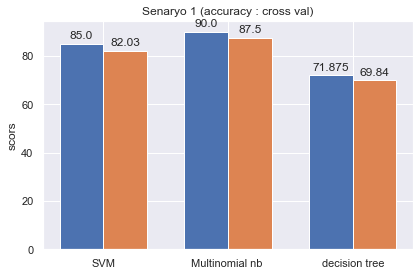

In [102]:
labels = ['SVM','Multinomial nb ', 'decision tree']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resultsenaryo1a, width)
rects2 = ax.bar(x + width/2, resultsenaryo1b, width)


ax.set_ylabel('scors')
ax.set_title('Senaryo 1 (accuracy : cross val)')
ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

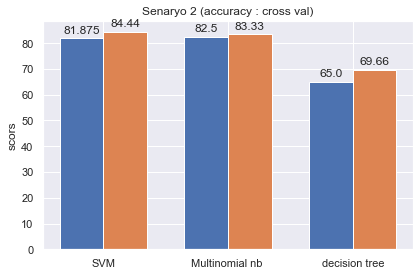

In [103]:
labels = ['SVM','Multinomial nb ', 'decision tree']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resultsenaryo2a, width)
rects2 = ax.bar(x + width/2, resultsenaryo2b, width)


ax.set_ylabel('scors')
ax.set_title('Senaryo 2 (accuracy : cross val)')
ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

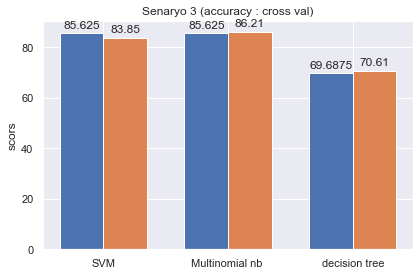

In [104]:
labels = ['SVM','Multinomial nb ', 'decision tree']

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, resultsenaryo3a, width)
rects2 = ax.bar(x + width/2, resultsenaryo3b, width)


ax.set_ylabel('scors')
ax.set_title('Senaryo 3 (accuracy : cross val)')
ax.set_xticks(x)
ax.set_xticklabels(labels)



def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()